# Forest Fire Detection Using Deep Learning

This notebook demonstrates a deep learning-based approach to detect forest fires using image data. It includes data preprocessing, model building, training, evaluation, and prediction steps.

# Project Structure:
1. Importing Libraries
2. Data Loading and Preprocessing
3. Data Visualization
4. Data augmentation & preprocessing
5. Building the Deep Learning Model
6. Model Training
7. Evaluation (confusion matrix & classification report)
8. Training plots (accuracy & loss)

# 1. Importing Libraries


This section imports all the required libraries.

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os

# Show downloaded dataset path
print("Dataset downloaded to:", path)

# Explore all folders & subfolders to find Train/Test
for root, dirs, files in os.walk(path):
    print("📁", root)
    for d in dirs:
        print("   └──", d)


Dataset downloaded to: /kaggle/input/the-wildfire-dataset
📁 /kaggle/input/the-wildfire-dataset
   └── the_wildfire_dataset_2n_version
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version
   └── val
   └── test
   └── train
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val
   └── nofire
   └── fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/nofire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test
   └── nofire
   └── fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train
   └── nofire
   └── fire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire
📁 /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_

# 2. Data Loading and Preprocessing
This section loads and preprocesses image data using ImageDataGenerator.

In [ ]:
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')


This cell performs part of the computation or utilities used in the project.

In [ ]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


# 3. Data Visualization
This section loads and preprocesses image data using ImageDataGenerator.

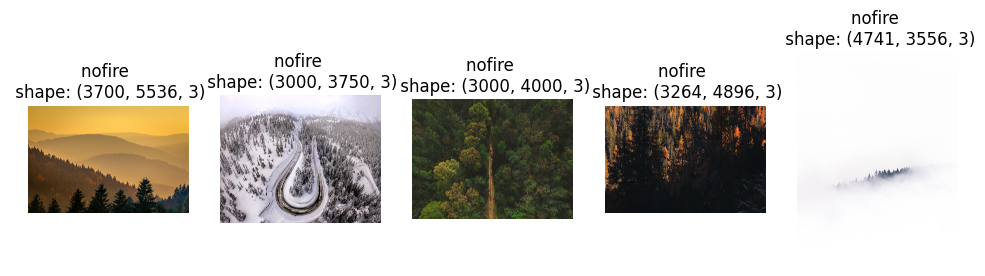

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

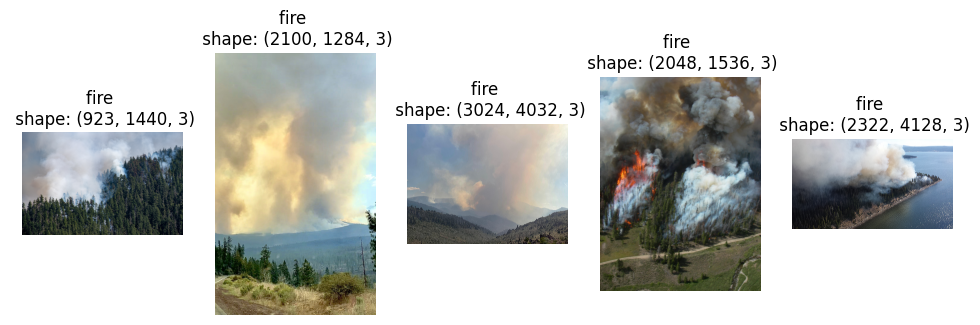

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

# 4. Data augmentation & preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30,
                                   zoom_range=0.2, shear_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 1887 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


# 5. Building the Deep Learning Model
Creating a CNN model using Keras Sequential API.

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Model Training
Training the model with the training data.

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 417s 7s/step - accuracy: 0.6160 - loss: 0.6495 - val_accuracy: 0.7098 - val_loss: 0.5558
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 372s 6s/step - accuracy: 0.7325 - loss: 0.5346 - val_accuracy: 0.7439 - val_loss: 0.4857
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 347s 6s/step - accuracy: 0.7573 - loss: 0.4968 - val_accuracy: 0.7780 - val_loss: 0.4552
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 365s 6s/step - accuracy: 0.7578 - loss: 0.4927 - val_accuracy: 0.7878 - val_loss: 0.4365
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 350s 6s/step - accuracy: 0.7679 - loss: 0.4905 - val_accuracy: 0.8073 - val_loss: 0.4226
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 390s 7s/step - accuracy: 0.7877 - loss: 0.4577 - val_accuracy: 0.8122 - val_loss: 0.4177
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 369s 6s/step - accuracy: 0.7846 - loss: 0.4661 - val_accuracy: 0.8098 - val_loss: 0.4071
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 359s 6s/step - accuracy: 0.7963 - loss: 0.4375 - val_accuracy: 0.7976 - v

# 7. Evaluation (confusion matrix & classification report)
Generating predictions for input images using the trained model.

13/13 ━━━━━━━━━━━━━━━━━━━━ 129s 10s/step
Classification Report:
               precision    recall  f1-score   support

        fire       0.40      0.61      0.48       159
      nofire       0.63      0.41      0.50       251

    accuracy                           0.49       410
   macro avg       0.51      0.51      0.49       410
weighted avg       0.54      0.49      0.49       410



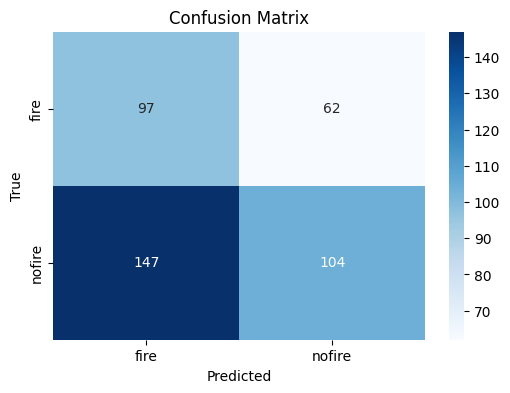

In [ ]:
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 8. Training plots (accuracy & loss)

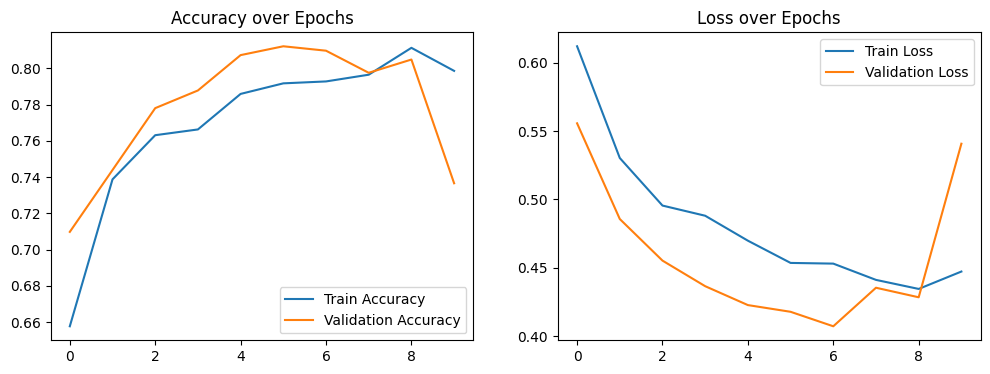

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
#  Saving the model
model.save('forest_fire_detection_model.h5')
print("✅ Model saved as forest_fire_detection_model.h5")

✅ Model saved as forest_fire_detection_model.h5


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('forest_fire_detection_model.h5')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [8]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


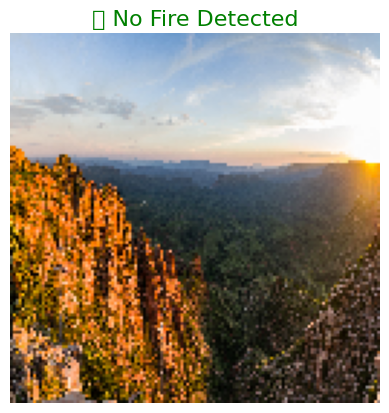

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_fire(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # normalize like training data

    prediction = model.predict(img_array)[0][0]

    plt.imshow(img)
    plt.axis('off')
    if prediction > 0.5:
        plt.title("🔥 Fire Detected!", color='red', fontsize=16)
    else:
        plt.title("✅ No Fire Detected", color='green', fontsize=16)
    plt.show()

# Example usage (this will display the image and prediction):
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/35554264024_b33afa21ac_o.jpg')
